In [269]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [270]:
#params

Ainit = 1e-5
kon = 1e5
koff = 1e-4
k = Ainit*kon
A0 = 1e5
rtot = 1e5
delta = 4
k1 = k/rtot
k2 = delta*k/rtot

alpha = koff/(k1*A0)
omega = koff/(delta*k1*rtot)
epsilon = (k2*rtot)/(k1*A0)



In [271]:
def model(t, z):
    dA1 = 2*alpha*(1 - (k1/koff)*A0*z[0] - 2*(k1/koff)*(k2/koff)*A0*rtot*z[1]) - alpha*z[0] - epsilon*((1 - (k1/koff)*A0*z[0] - 2*(k1/koff)*(k2/koff)*A0*rtot*z[1])*z[0] - 2*z[1])
    dA2 = omega*epsilon*((1 - (k1/koff)*A0*z[0] - 2*(k1/koff)*(k2/koff)*A0*rtot*z[1])*z[0] - 2*z[1])

    dz = [dA1, dA2]

    return dz

In [272]:
tend = 1000000
t = np.geomspace(1e-8, tend, 1000)
z0 = [0, 0]
tspan = [1e-8, tend]

z = solve_ivp(model, tspan, z0, method='LSODA', t_eval=t)

In [273]:
def small_time_scale(t):
    return (2*alpha/(1 + 2*alpha*(k1/koff)*A0))*(1 - np.exp(-(1 + 2*alpha*(k1/koff)*A0)*(t*k1*A0)))

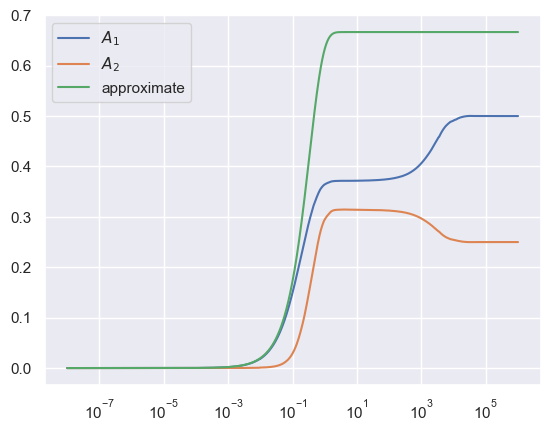

In [274]:
sns.set_theme()

r = 1 - (k1/koff)*z.y[0] - (k1/koff)*(k2/koff)*A0*rtot*z.y[1]

A1 = z.y[0]*(k1/koff)*A0
A2 = z.y[1]*delta*((k1/koff)**2)*A0*rtot
plt.plot(t, A1, label = r'$A_1$')
#plt.plot(t, r, label=r'r')
plt.plot(t, A2, label = r'$A_2$')
plt.plot(t, small_time_scale(t)*(k1/koff)*A0, label='approximate')
plt.legend(loc='best')
plt.xscale('log')
plt.show()